In [135]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt

In [107]:
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 

X.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [108]:
# metadata
statlog_german_credit_data.metadata

{'uci_id': 144,
 'name': 'Statlog (German Credit Data)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data',
 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv',
 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1000,
 'num_features': 20,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1994,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5NC77',
 'creators': ['Hans Hofmann'],
 'intro_paper': None,
 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in

In [109]:
# variable information 
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


#### Feature engineering

Attribute 1:  (qualitative)  - Status of existing checking account

In [110]:
print(X['Attribute1'].value_counts())

# Regroup A12 and A13
mapping = {'A11': 'overdrawn',
           'A12': 'stable balance',
           'A13': 'stable balance',
           'A14': 'no account'}
X.loc[:, 'Attribute1'] = X['Attribute1'].replace(mapping)
# Verification
print(X['Attribute1'].value_counts())

Attribute1
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64
Attribute1
no account        394
stable balance    332
overdrawn         274
Name: count, dtype: int64


Attribute 3:  (qualitative) -    Credit history

In [111]:
print(X['Attribute3'].value_counts())

# # Regroup A30 and A31 into 'good', A33and A34 into 'bad'
mapping = {'A30': 'good',
           'A31': 'good',
           'A33': 'bad',
           'A34': 'bad',
           'A32': 'being repaid'}
X.loc[:, 'Attribute3'] = X['Attribute3'].replace(mapping)
# Verification
print(X['Attribute3'].value_counts())

Attribute3
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64
Attribute3
being repaid    530
bad             381
good             89
Name: count, dtype: int64


Attribute 4:  (qualitative) -  Purpose

In [112]:
print(X['Attribute4'].value_counts())

# Regroup into 6 categories
mapping = {'A40': 'car',
            'A41': 'car',
            'A42': 'domestic equipment',
            'A43': 'domestic equipment',
            'A44': 'domestic equipment',
            'A45': 'repairs',
            'A46': 'education',
            'A48': 'education',
            'A49': 'business',
            'A410': 'others'
            }

X.loc[:, 'Attribute4'] = X['Attribute4'].replace(mapping)
# Verification
print(X['Attribute4'].value_counts())

Attribute4
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64
Attribute4
domestic equipment    473
car                   337
business               97
education              59
repairs                22
others                 12
Name: count, dtype: int64


Attribute 6:  (qualitative) -  Savings account/bonds

In [113]:
print(X['Attribute6'].value_counts())

# Regroup into 4 categories
mapping = {'A61': 'little',
           'A62': 'moderate',
           'A63': 'moderate',
           'A64': 'rich',
           'A65': 'NA'
            }

X.loc[:, 'Attribute6'] = X['Attribute6'].replace(mapping)
# Verification
print(X['Attribute6'].value_counts())

Attribute6
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64
Attribute6
little      603
NA          183
moderate    166
rich         48
Name: count, dtype: int64


Attribute 7:  (qualitative) -   Present employment since

In [114]:
print(X['Attribute7'].value_counts())

# Regroup into 3 categories
mapping = {'A71': 'unemployed',
           'A72': 'recent position',
           'A73': 'recent position',
           'A74': 'long-term position',
           'A75': 'long-term position'
            }

X.loc[:, 'Attribute7'] = X['Attribute7'].replace(mapping)
# Verification
print(X['Attribute7'].value_counts())

Attribute7
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64
Attribute7
recent position       511
long-term position    427
unemployed             62
Name: count, dtype: int64


Attribute 8:  (numerical) -    Installment rate in percentage of disposable income

In [115]:
print(X['Attribute8'].value_counts())

Attribute8
4    476
2    231
3    157
1    136
Name: count, dtype: int64


Attribute 9:  (qualitative)  -  Personal status and sex

In [116]:
print(X['Attribute9'].value_counts())

# Regroup into 6 categories
mapping = { 'A91': 'male',
            'A93': 'male',
            'A94': 'male',
            'A92': 'female',
            'A95': 'female'
            }

X.loc[:, 'Attribute9'] = X['Attribute9'].replace(mapping)

# Verification
print(X['Attribute9'].value_counts())

Attribute9
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64
Attribute9
male      690
female    310
Name: count, dtype: int64


Attribute 10: (qualitative)  -  Other debtors / guarantors

In [117]:
print(X['Attribute10'].value_counts())

# categories didn't change but for better readability
mapping = {'A101': 'none',
           'A102': 'co-applicant',
           'A103': 'guarantor'
           }

X.loc[:, 'Attribute10'] = X['Attribute10'].replace(mapping)

# Verification
print(X['Attribute10'].value_counts())

Attribute10
A101    907
A103     52
A102     41
Name: count, dtype: int64
Attribute10
none            907
guarantor        52
co-applicant     41
Name: count, dtype: int64


Attribute 15: (qualitative) -    Housing

In [118]:
print(X['Attribute15'].value_counts())

# categories didn't change but for better readability
mapping = {'A151': 'rent',
           'A152': 'own',
           'A153': 'for free'
           }

X.loc[:, 'Attribute15'] = X['Attribute15'].replace(mapping)

# Verification
print(X['Attribute15'].value_counts())

Attribute15
A152    713
A151    179
A153    108
Name: count, dtype: int64
Attribute15
own         713
rent        179
for free    108
Name: count, dtype: int64


Attribute 17: (qualitative) -   Job


In [119]:
print(X['Attribute17'].value_counts())

# Regroup into 2 categories
mapping = { 'A171': 'unskilled',
            'A172': 'unskilled',
            'A173': 'skilled',
            'A174': 'skilled'
            }

X.loc[:, 'Attribute17'] = X['Attribute17'].replace(mapping)

# Verification
print(X['Attribute17'].value_counts())

Attribute17
A173    630
A172    200
A174    148
A171     22
Name: count, dtype: int64
Attribute17
skilled      778
unskilled    222
Name: count, dtype: int64


We drop attributes 8, 11, 12, 14, 19, 20

In [ ]:
# Drop specified attributes
X = X.drop(['Attribute8', 'Attribute11', 'Attribute12', 'Attribute14', 'Attribute19', 'Attribute20'], axis=1)
print(X.columns)

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute13', 'Attribute15', 'Attribute16', 'Attribute17',
       'Attribute18'],
      dtype='object')


#### Categorical variables encoding

encoder aussi variables numériques catégorielles ? (age / durée /Number of existing credits at this bank/ )
dans un nombre de catégories limitées (ranges ex [0:10], [10:20], ...) au lieu de garder des variables continues ?

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ordinal variables :

mapping_attr1 = {'overdrawn': 1, 'no account': 2, 'stable balance': 3}
mapping_attr3 = {'bad': 1, 'being repaid': 2, 'good': 3}
mapping_attr6 = {'little': 1, 'NA':2, 'moderate': 3, 'rich': 4}
mapping_attr7 = {'unemployed': 1, 'recent position': 2, 'long-term position': 3}
mapping_attr17 = {'unskilled': 1, 'skilled': 2}

# Apply mappings to specific columns
X['Attribute1'] = X['Attribute1'].map(mapping_attr1)
X['Attribute3'] = X['Attribute3'].map(mapping_attr3)
X['Attribute6'] = X['Attribute6'].map(mapping_attr6)
X['Attribute7'] = X['Attribute7'].map(mapping_attr7)
X['Attribute17'] = X['Attribute17'].map(mapping_attr17)

# # Binary Encoding for the Sex variable
# mapping_attr9 = {'male': 0, 'female': 1}
# X['Attribute9'] = X['Attribute9'].map(mapping_attr9)
label=LabelEncoder()
X['Attribute9']=label.fit_transform(X['Attribute9'])

# One-Hot Encoding for non-ordinal variables
X_encoded = pd.get_dummies(X, columns=['Attribute4', 'Attribute10', 'Attribute15'], drop_first=True)


#### Scale continuous variables (only credit amount)

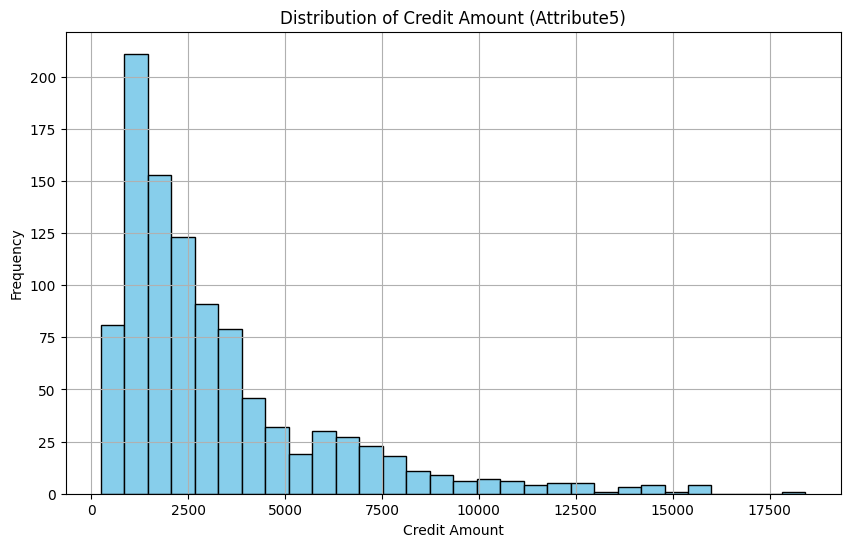

In [136]:
# Plot the distribution of credit amount
plt.figure(figsize=(10, 6))
plt.hist(X['Attribute5'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Credit Amount (Attribute5)')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X['Attribute5']=scaler.fit_transform(X[['Attribute5']])

In [133]:
statlog_german_credit_data.variables
# X['Attribute7'].unique()

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [123]:
# crosstab Sex / Credit score
pd.crosstab(X["Attribute9"],y.values.ravel())

col_0,1,2
Attribute9,,
0,201,109
1,499,191


In [124]:
pd.crosstab(X["Attribute15"],y.values.ravel())

col_0,1,2
Attribute15,,
for free,64,44
own,527,186
rent,109,70
